# **Este é o segundo projeto do curso de Data Science na materia de técnicas de programação.**
# *Este curso é organizado pela ada e patrocinada pelo Santander.*




<img src="https://www.meioemensagem.com.br/wp-content/uploads/2018/03/Santander_NovaMarca_575.png" alt="Imagem Logo Santader" width="400" height="200">
<img src="https://ada-site-frontend.s3.sa-east-1.amazonaws.com/home/header-logo.svg" alt="Logo Ada" width="300" height="200">


Conforme a proposta de analise exploratoria proposta para esse projeto escolhemos um dataset da fila de espera de transplante de rim no brasil.

Fonte:  https://www.kaggle.com/datasets/gustavomodelli/waitlist-kidney-brazil

**Membros do Grupo:**




* André Oliveira
* Bruna Manzi
* Jenifer Ferreira
* Vinicius Batista


Objetivo com o data Set escolhido:

Nosso grupo optou por este dataset na area da saúde para estudar e prever correlações

**Bibliotecas usadas:**

In [ ]:
!pip install lifelines
!pip install seaborn

In [ ]:
import numpy as nb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Importando o DataSet:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_kidney = pd.read_csv('//content/drive/MyDrive/Santander Coders/DataSets/waitlist_kidney_brazil.csv', encoding='latin-1')
df_kidney.head()

,Id,date,age_at_list_registration,age_cat,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,...,Time_death,Transplant,Transplant_Y_N,X36MthsTx,Time_Tx,priorization,removed_list,razon_removed,time,event
0,4,2017-06-29,67,Maior.60,1.0,Branca,M,Outras,1,A,...,13,Não,Não,0,13.07,Não,Não,NaN,392,0
1,5,2008-11-03,58,18.a.60,4.0,Branca,M,Diabetes,0,A,...,69,Óbito Lista,Não,0,68.87,Não,Não,NaN,2066,2
2,6,2010-07-13,51,18.a.60,2.0,Branca,M,HAS,1,O,...,98,Não,Não,0,12.17,Não,Sim,Removido (suspenso > 365 dias),365,3
3,7,2011-10-03,52,18.a.60,17.0,Branca,M,Diabetes,0,O,...,83,Não,Não,0,12.17,Não,Sim,Removido (suspenso > 365 dias),365,3
4,8,2006-07-05,67,Maior.60,68.0,Parda,M,HAS,1,A,...,6,Óbito Lista,Não,0,6.47,Não,Não,NaN,194,2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Analisando dados do Dataset:**

O comando ".desc()" informa a quantidade de valores não-nulos (non-null) de cada coluna, a nomenclatura de cada coluna e o tipo de Dado de cada coluna (int64, object e float64, por exemplo). Valores Nulos podem interferir nas análises, sendo necessário um tratamento dos mesmos. Além disso, é fundamental uma análise se o tipo de dado é concordante com a informação que a coluna pretende transmitir.
Em seguido utilizamos o comando describe para verificar as médias do dataset.


***Nota-se valores nulos na coluna "number_gestation", "chagas", "anti.HCV", "agHBs" e "razon_removed".***

In [ ]:
print(f'o tamanho do data set é:\n{df_kidney.shape}')
print(f'{df_kidney.info()}')
df_kidney.describe()

o tamanho do data set é:
(48153, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48153 entries, 0 to 48152
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          48153 non-null  int64  
 1   date                        48153 non-null  object 
 2   age_at_list_registration    48153 non-null  int64  
 3   age_cat                     48153 non-null  object 
 4   time_on_Dialysis            46817 non-null  float64
 5   race                        48153 non-null  object 
 6   sex                         48153 non-null  object 
 7   underline_disease           48153 non-null  object 
 8   diabetes                    48153 non-null  int64  
 9   Blood_type                  48153 non-null  object 
 10  number_transfusion          48153 non-null  int64  
 11  gestation                   48153 non-null  object 
 12  number_gestation            19464 non-null  float64

,Id,age_at_list_registration,time_on_Dialysis,diabetes,number_transfusion,number_gestation,number_prior_transplant,cPRA,HLA_A1,HLA_A2,...,calculated_frequency_B.f,calculated_frequency_A.f1,calculated_frequency_A.f2,calculated_frequency_A.f,date_acutal,Time_death,X36MthsTx,Time_Tx,time,event
count,48153.000000,48153.000000,46817.000000,48153.000000,48153.000000,19464.000000,48153.000000,48153.000000,48153.000000,48153.000000,...,48153.000000,48153.000000,48153.000000,48153.000000,48153.0,48153.000000,48153.000000,48153.000000,48153.000000,48153.000000
mean,29486.740515,48.613399,21.054254,0.792599,0.412518,2.040793,0.146325,14.402093,10.359168,28.816211,...,1.182590,0.235889,0.118824,2.697248,43307.0,75.726372,0.205117,35.527375,1090.576350,1.558864
std,16186.744194,14.707031,29.212685,0.405450,0.635550,2.413947,0.409814,29.119877,13.485239,21.826129,...,1.096077,0.145272,0.098990,2.789760,0.0,57.602143,0.403791,30.977942,955.582713,1.138825
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,43307.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15902.000000,39.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.000000,...,0.360000,0.130000,0.060000,0.780000,43307.0,27.000000,0.000000,13.670000,414.000000,1.000000
50%,29921.000000,50.000000,10.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,29.000000,...,0.840000,0.170000,0.110000,1.760000,43307.0,61.000000,0.000000,26.300000,800.000000,1.000000
75%,43387.000000,59.000000,23.000000,1.000000,1.000000,3.000000,0.000000,9.000000,23.000000,33.000000,...,1.710000,0.420000,0.130000,4.200000,43307.0,112.000000,0.000000,47.670000,1470.000000,3.000000
max,56937.000000,97.000000,180.000000,1.000000,3.000000,63.000000,5.000000,100.000000,80.000000,80.000000,...,4.410000,0.420000,0.420000,17.640000,43307.0,226.000000,1.000000,225.870000,6776.000000,3.000000


**Olhando os nomes de colunas omitidas:**

In [ ]:
df_kidney.columns

Index(['Id', 'date', 'age_at_list_registration', 'age_cat', 'time_on_Dialysis',
       'race', 'sex', 'underline_disease', 'diabetes', 'Blood_type',
       'number_transfusion', 'gestation', 'number_gestation',
       'prior_transplant', 'number_prior_transplant', 'subregion', 'cPRA',
       'cPRA_cat', 'HLA_A1', 'HLA_A2', 'HLA_B1', 'HLA_B2', 'HLA_DR1',
       'HLA_DR2', 'DR_00', 'B_00', 'A_00', 'calculated_frequency_DR.f1',
       'calculated_frequency_DR.f2', 'calculated_frequency_DR.f',
       'calculated_frequency_B.f1', 'calculated_frequency_B.f2',
       'calculated_frequency_B.f', 'calculated_frequency_A.f1',
       'calculated_frequency_A.f2', 'calculated_frequency_A.f', 'chagas',
       'anti.HBc', 'anti.HCV', 'agHBs', 'patient_still_on_list', 'date_acutal',
       'death', 'Time_death', 'Transplant', 'Transplant_Y_N', 'X36MthsTx',
       'Time_Tx', 'priorization', 'removed_list', 'razon_removed', 'time',
       'event'],
      dtype='object')

**Removendo cabeçalhos não utilizados nesta analise:**

In [ ]:
predictor_columns = [
    'age_at_list_registration', 'sex', 'race', 'time_on_Dialysis', 'Blood_type', 'age_cat', 'Transplant', 'cPRA_cat',
    'number_transfusion', 'gestation', 'number_gestation', 'prior_transplant', 'underline_disease',
    'number_prior_transplant', 'chagas', 'anti.HBc', 'anti.HCV', 'agHBs', 'Transplant_Y_N', 'Time_Tx', 'time'
]

predictors = df_kidney[predictor_columns]

df_kidney = predictors.copy()
df_kidney.head()

,age_at_list_registration,sex,race,time_on_Dialysis,Blood_type,age_cat,Transplant,cPRA_cat,number_transfusion,gestation,...,prior_transplant,underline_disease,number_prior_transplant,chagas,anti.HBc,anti.HCV,agHBs,Transplant_Y_N,Time_Tx,time
0,67,M,Branca,1.0,A,Maior.60,Não,Zero,0,Não,...,Não,Outras,0,Não,Não,Não,Não,Não,13.07,392
1,58,M,Branca,4.0,A,18.a.60,Óbito Lista,Zero,0,Não,...,Não,Diabetes,0,Não,Não,Não,Não,Não,68.87,2066
2,51,M,Branca,2.0,O,18.a.60,Não,Entre_50_80,0,Não,...,Não,HAS,0,Não,Não,Não,Não,Não,12.17,365
3,52,M,Branca,17.0,O,18.a.60,Não,Entre_0_50,0,Não,...,Sim,Diabetes,1,Não,Não,Não,Não,Não,12.17,365
4,67,M,Parda,68.0,A,Maior.60,Óbito Lista,Zero,0,Não,...,Não,HAS,0,Não,Não,Não,Não,Não,6.47,194


**Verificando numero de dados duplicados e eliminando eles usando drop:**


In [ ]:
print(df_kidney.duplicated().sum())
df_kidney = df_kidney.drop_duplicates()
df_kidney.duplicated().sum()

15


0

**O comando ".unique()" retorna os valores únicos contidos na coluna selecionada. Aplica-se nas colunas com dados do tipo "Object" para uma análise os dados da coluna estão congruentes com a informação transmitida.**

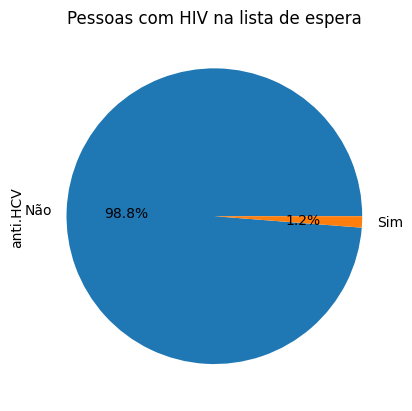

In [ ]:
df_kidney['anti.HCV'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pessoas com HIV na lista de espera")
plt.show()

**Como vemos com o comando mode(moda) a idade mais comum de falha do rim é 56, sexo masculino e tipo sanguineo O.**

In [ ]:

df_kidney.mode()

,age_at_list_registration,sex,race,time_on_Dialysis,Blood_type,age_cat,Transplant,cPRA_cat,number_transfusion,gestation,...,prior_transplant,underline_disease,number_prior_transplant,chagas,anti.HBc,anti.HCV,agHBs,Transplant_Y_N,Time_Tx,time
0,56,M,Branca,4.0,O,18.a.60,Não,Zero,0,Não,...,Não,Outras,0,Não,Não,Não,Não,Não,12.17,365


Com esse grafica analisamos a situação geral da lista de espera, sendo:

52.5% ainda na espera

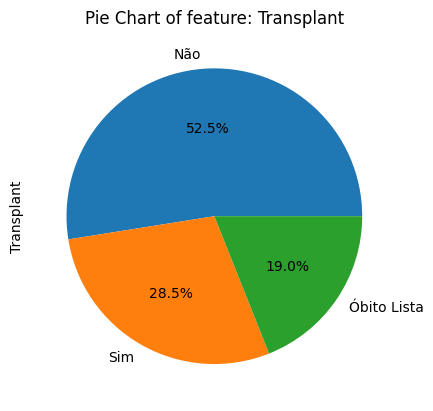

Não            25277
Sim            13730
Óbito Lista     9131
Name: Transplant, dtype: int64

In [ ]:
df_kidney['Transplant'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of feature: Transplant')
plt.show()
df_kidney['Transplant'].value_counts()

- CORRELAÇÃO ENTRE O TEMPO MÉDIO PARA TRANSPLANTES REALIZADOS COM ÊXITO E SEXO

Realizou-se uma análise para determinar se a média do Tempo de Espera é maior ou menor para o grupo do "Sexo Feminino" em comparação com o grupo do "Sexo Masculino"

In [ ]:
#Criando uma Máscara para Transplantes bem-sucedidos
transplante_sim = df_kidney['Transplant'] == 'Sim'

In [ ]:
#Criando a Máscara para o grupo do Sexo Feminino

feminino = df_kidney['sex'] == 'F'
#Salvando na variável "feminino", pois o retorno do código "df_listadeespera['sex'] == 'F'"
#é um valor Booleano.

#Aplicando a máscara no Dataframe original, teremos apenas as colunas com o grupo do "Sexo
#Feminino" no novo dataframe
fem_transplante_sim = df_kidney[feminino][transplante_sim]

fem_transplante_sim

<ipython-input-39-23eb2c7ebb90>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_transplante_sim = df_kidney[feminino][transplante_sim]


,age_at_list_registration,sex,race,time_on_Dialysis,Blood_type,age_cat,Transplant,cPRA_cat,number_transfusion,gestation,...,prior_transplant,underline_disease,number_prior_transplant,chagas,anti.HBc,anti.HCV,agHBs,Transplant_Y_N,Time_Tx,time
28,33,F,Parda,12.0,A,18.a.60,Sim,Zero,0,Não,...,Não,GNC,0,Não,Não,Não,Não,Sim,15.47,464
34,66,F,Branca,20.0,AB,Maior.60,Sim,Zero,1,Sim,...,Não,Outras,0,Não,Não,Não,Não,Sim,56.93,1708
38,58,F,Branca,3.0,A,18.a.60,Sim,Entre_0_50,0,Não,...,Não,Diabetes,0,Não,Não,Não,Não,Sim,9.60,288
126,64,F,Parda,19.0,O,Maior.60,Sim,Zero,0,Sim,...,Não,Outras,0,Não,Não,Sim,Não,Sim,43.37,1301
237,68,F,Parda,27.0,B,Maior.60,Sim,Zero,1,Sim,...,Não,Diabetes,0,Não,Não,Não,Não,Sim,33.37,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48127,36,F,Parda,5.0,O,18.a.60,Sim,Zero,0,Sim,...,Não,HAS,0,Não,Não,Não,Não,Sim,45.57,1367
48131,67,F,Branca,10.0,A,Maior.60,Sim,Entre_50_80,1,Sim,...,Não,HAS,0,Não,Não,Não,Não,Sim,44.80,1344
48137,58,F,Parda,19.0,A,18.a.60,Sim,Zero,0,Não,...,Não,Diabetes,0,Não,Não,Não,Não,Sim,51.00,1530
48139,56,F,Branca,25.0,A,18.a.60,Sim,Zero,0,Sim,...,Sim,Outras,1,Não,Não,Não,Não,Sim,22.83,685


In [ ]:
#Quantidade de transplantes bem sucedidos para o grupo do Sexo Feminino
len(fem_transplante_sim['time'])

5263

Aplicando a lógica anterior para adquirir a média de tempo na fila de espera para o grupo do sexo masculino

In [ ]:
#criando a máscara
masculino = df_kidney['sex'] == 'M'

#Aplicando a máscara no Dataframe original, teremos apenas as colunas com o grupo do "Sexo
#Feminino" no novo dataframe
mas_transplante_sim = df_kidney[masculino][transplante_sim]
mas_transplante_sim

mas_transplante_sim['time'].mean()

<ipython-input-38-712210b16711>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mas_transplante_sim = df_kidney[masculino][transplante_sim]


838.3441596787528

Criando um gráfico para comparar os grupos em relação ao tempo de espera, utilizando a biblioteca matplotlib

In [ ]:
#Criando duas variáveis para armazenar o valor da média do tempo
media_fem = fem_transplante_sim['time'].mean()
media_mas = mas_transplante_sim['time'].mean()

Text(0.5, 1.0, 'Relação do Tempo de Espera por Sexo para Transplantes Realizados com Sucesso')

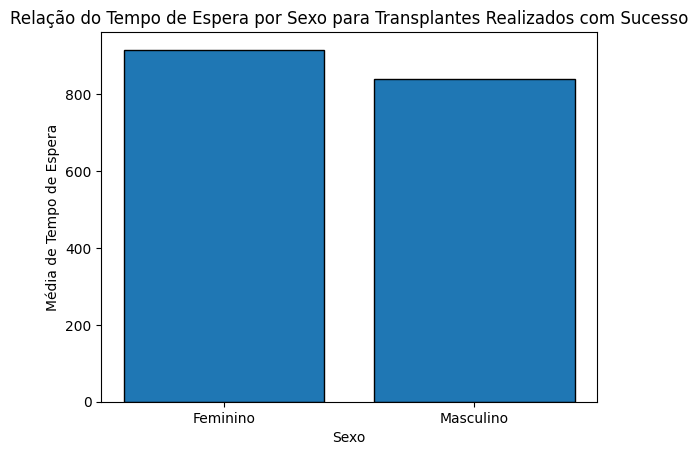

In [ ]:
#Criando o Gráfico de Barras
plt.bar(['Feminino', 'Masculino'], [media_fem, media_mas], edgecolor = (0, 0, 0)) #Criação dos eixos do Gráfico
plt.xlabel('Sexo') #Legenda para o eixo x
plt.ylabel('Média de Tempo de Espera') #Legenda para o eixo y
plt.title('Relação do Tempo de Espera por Sexo para Transplantes Realizados com Sucesso') #Título do Gráfico

-  AVALIANDO RELAÇÃO ENTRE IDADE E TEMPO DE ESPERA

In [ ]:
#Verificando os dados únicos para a faixa de idade
df_kidney['age_cat'].unique()

array(['Maior.60', '18.a.60', 'Menor.18'], dtype=object)

Observou-se que a coluna 'age_cat' trabalha com 3 faixas de idade: Maior que 60, entre 18 a 60 e menor que 18 anos.

In [ ]:
range18a60 = df_kidney['age_cat'] == '18.a.60'

entre18a60 = df_kidney[range18a60][transplante_sim]

<ipython-input-45-d322e8f0b3dd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  entre18a60 = df_kidney[range18a60][transplante_sim]


In [ ]:
rangemaior60 = df_kidney['age_cat'] == 'Maior.60'

maior60 = df_kidney[rangemaior60][transplante_sim]

<ipython-input-47-4917c4a7794c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  maior60 = df_kidney[rangemaior60][transplante_sim]


In [ ]:
rangemenor18 = df_kidney['age_cat'] == 'Menor.18'

menor18 = df_kidney[rangemenor18][transplante_sim]

<ipython-input-48-860292d45f67>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  menor18 = df_kidney[rangemenor18][transplante_sim]


Text(0.5, 1.0, 'Transplantes realizados com sucesso por Faixa de idade')

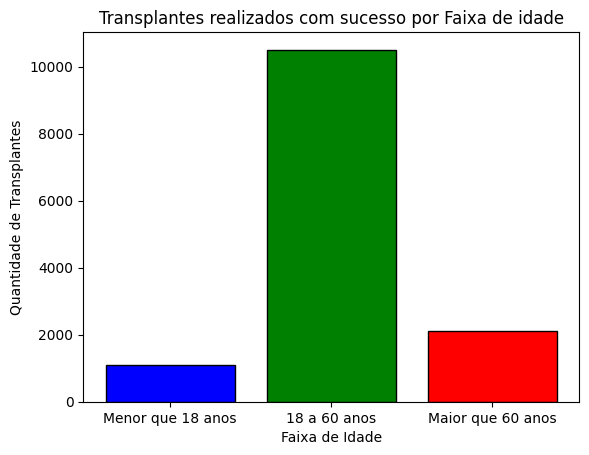

In [ ]:
#Criando o Gráfico de Barras
plt.bar(
    ['Menor que 18 anos', '18 a 60 anos', 'Maior que 60 anos'], #Legenda para as Barras
    [len(menor18), len(entre18a60), len(maior60)], #Quantidade de transplantes realizados com sucesso
    edgecolor = (0, 0, 0), #Bordas na cor preta para o gráfico
    color = ['blue', 'green', 'red'] #Cores das Barras
    )
#Criação dos eixos do Gráfico
plt.xlabel('Faixa de Idade') #Legenda para o eixo x
plt.ylabel('Quantidade de Transplantes') #Legenda para o eixo y
plt.title('Transplantes realizados com sucesso por Faixa de idade') #Título do Gráfico

- CORRELAÇÃO ENTRE O TIPO SANGUÍNEO E O TEMPO DE ESPERA

In [ ]:
#Verificando os valores únicos para a coluna "Blood_type"
df_kidney['Blood_type'].unique()

array(['A', 'O', 'B', 'AB'], dtype=object)

In [ ]:
type_A = df_kidney['Blood_type'] == 'A' #Máscara para retornar apenas os Dados do Tipo 'A'

time_A = df_kidney[type_A]['time'].mean()
time_A

1026.2198489497287

In [ ]:
type_O = df_kidney['Blood_type'] == 'O' #Máscara para retornar apenas os Dados do Tipo 'A'

time_O = df_kidney[type_O]['time'].mean()
time_O

1163.3924248836224

In [ ]:
type_B = df_kidney['Blood_type'] == 'B' #Máscara para retornar apenas os Dados do Tipo 'A'

time_B = df_kidney[type_B]['time'].mean()
time_B

1027.7126692953882

In [ ]:
type_AB = df_kidney['Blood_type'] == 'AB' #Máscara para retornar apenas os Dados do Tipo 'A'

time_AB = df_kidney[type_AB]['time'].mean()
time_AB

941.0538506079907

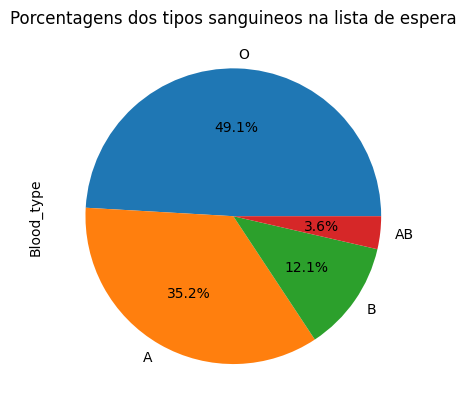

O     23630
A     16948
B      5833
AB     1727
Name: Blood_type, dtype: int64

In [ ]:
df_kidney['Blood_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentagens dos tipos sanguineos na lista de espera')
plt.show()
df_kidney['Blood_type'].value_counts()

Text(0.5, 1.0, 'Tempo médio de Espera por Tipo Sanguíneo')

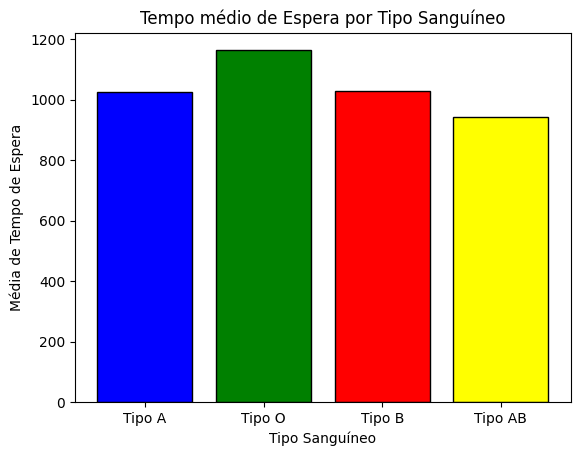

In [ ]:
plt.bar(
    ['Tipo A', 'Tipo O', 'Tipo B', 'Tipo AB'], #Legenda para as Barras
    [time_A, time_O, time_B, time_AB], #Quantidade de transplantes realizados com sucesso
    edgecolor = (0, 0, 0), #Bordas na cor preta para o gráfico
    color = ['blue', 'green', 'red', 'yellow'] #Cores das Barras
    )
#Criação dos eixos do Gráfico
plt.xlabel('Tipo Sanguíneo') #Legenda para o eixo x
plt.ylabel('Média de Tempo de Espera') #Legenda para o eixo y
plt.title('Tempo médio de Espera por Tipo Sanguíneo') #Título do Gráfico



**Conclusão da Analise**

Após examinar os dados coletados, pudemos extrair informações bastante interessantes. Por exemplo, observamos que o tipo sanguíneo mais comumente associado a falhas renais é o O+. Considerando a distribuição dos tipos sanguíneos no Brasil, percebemos que o O+ é o segundo mais prevalente, sugerindo uma possível correlação com esse problema. No entanto, para confirmar essa hipótese, será necessário conduzir uma análise mais aprofundada, incluindo a coleta de informações sobre o estilo de vida dos pacientes.

Além disso, identificamos diferenças significativas no tempo de espera pela realização do transplante renal, tanto com relação ao sexo quanto à idade. Notavelmente, as mulheres tendem a permanecer mais tempo na fila de espera e apresentam uma taxa de mortalidade menor em comparação aos homens. Um próximo passo crucial seria investigar a adesão ao tratamento entre esses grupos e, possivelmente, promover a conscientização entre o público masculino sobre a importância da manutenção da saúde renal durante o período de espera, visando aprimorar as taxas de sucesso no transplante.


Quanto ao projeto do curso e ao aprendizado, conseguimos aprimorar significativamente nossa colaboração em equipe e o domínio das ferramentas Pandas/Python.